# **Project name : Book Recommendation System**

## **Project Type : Unsupervised ML**
---
---



## **Project summary :**

---
---

### During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create recommendation system for users.

## **Data Description :**

---

---

### The Book-Crossing dataset comprises of 3 files.
### **1. Users :**
### Contains the users. The user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.
### **2. Books :**
### Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book_Title, Book_Author, Year_Of_Publication, Publisher), obtained from Amazon Web Services. In the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image_URL_S, Image_URL_M, Image_URL_L), i.e., small, medium, large. These URLs point to the Amazon website.
### **3. Ratings :**
### Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

from skimage import io

import warnings
warnings.filterwarnings("ignore")

In [2]:
# mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the books dataset
books_df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/Project-4 (Unsupervised ML)/Books.csv',
            names=['ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'Image_URL_S', 'Image_URL_M', 'Image_URL_L'], header=0)

In [4]:
# reading the users dataset
users_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/Project-4 (Unsupervised ML)/Users.csv')

In [5]:
# loading the book ratings dataset
ratings_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/Project-4 (Unsupervised ML)/Ratings.csv')

## **Exploratory Data Analysis on books_df**

In [6]:
# First look of the books dataset
books_df.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
# number of rows and columns
print('number of rows : ', books_df.shape[0])
print('number of columns : ', books_df.shape[1])

number of rows :  271360
number of columns :  8


In [8]:
# Information of the dataset
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book_Title           271360 non-null  object
 2   Book_Author          271359 non-null  object
 3   Year_Of_Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image_URL_S          271360 non-null  object
 6   Image_URL_M          271360 non-null  object
 7   Image_URL_L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
# Description of the dataset
books_df.describe(include='all')

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [10]:
#checking for duplicates
books_df.duplicated().sum()

0

In [11]:
# List of the columns
books_df.columns.to_list()

['ISBN',
 'Book_Title',
 'Book_Author',
 'Year_Of_Publication',
 'Publisher',
 'Image_URL_S',
 'Image_URL_M',
 'Image_URL_L']

In [12]:
# checking the null values in our dataset
books_df.isna().sum()

ISBN                   0
Book_Title             0
Book_Author            1
Year_Of_Publication    0
Publisher              2
Image_URL_S            0
Image_URL_M            0
Image_URL_L            3
dtype: int64

## Treating Nan value of Book_Author Column :

In [13]:
# finding the row with null value in 'Book_Author' column
books_df[books_df['Book_Author'].isna()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [14]:
books_df[books_df.Book_Title== books_df[books_df['Book_Author'].isna()].reset_index()['Book_Title'][0]]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


### As there is only one book titled **The Credit Suisse Guide to Managing Your Personal Wealth** which has no auther. So we are going to remove that record.

In [15]:
# Dropping Row containing NaN value.
books_df.dropna(subset= 'Book_Author', inplace=True)

In [16]:
# Rechecking
books_df[books_df['Book_Author'].isna()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L


## Treating Nan value of Publisher Column :

In [17]:
# finding the rows with null value in 'Publisher' column
books_df[books_df['Publisher'].isna()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [18]:
books_df[(books_df.Book_Author== 'Elaine Corvidae')|(books_df.Book_Author== 'Linnea Sinclair')]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129001,0759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory,http://images.amazon.com/images/P/0759901880.0...,http://images.amazon.com/images/P/0759901880.0...,http://images.amazon.com/images/P/0759901880.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


### As there is no common rows present, we will remove those rows containing NaN values.

In [19]:
# Dropping Row containing NaN value.
books_df.dropna(subset= 'Publisher', inplace=True)

In [20]:
# Rechecking
books_df[books_df['Publisher'].isna()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L


## Treating Nan value of Image_URL_L Column :

In [21]:
books_df[books_df.Image_URL_L.isna()].reset_index()

,index,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
1,220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
2,221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [22]:
books_df[(books_df.Book_Title== books_df[books_df.Image_URL_L.isna()].reset_index().Book_Title[0]) |
 (books_df.Book_Title== books_df[books_df.Image_URL_L.isna()].reset_index().Book_Title[1]) |
  (books_df.Book_Title== books_df[books_df.Image_URL_L.isna()].reset_index().Book_Title[2])]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


### As there is no common rows present, we will remove those rows containing NaN values.

In [23]:
# Dropping Row containing NaN value.
books_df.dropna(subset= 'Image_URL_L', inplace=True)

In [24]:
# Rechecking
books_df[books_df['Image_URL_L'].isna()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L


In [25]:
books_df.isna().sum()

ISBN                   0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
dtype: int64

## We successfully Treated the Null Values.

In [26]:
books_df['Book_Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: Book_Author, Length: 102020, dtype: int64

In [27]:
# Converting the data type of Year_Of_Publication column into integer.
books_df['Year_Of_Publication']= books_df['Year_Of_Publication'].astype(int)

In [28]:
# Checking unique values.
books_df['Year_Of_Publication'].nunique(), np.sort((books_df['Year_Of_Publication'].unique()))

(116,
 array([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908,
        1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
        1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
        1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
        1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
        1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
        1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
        1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
        1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
        2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021,
        2024, 2026, 2030, 2037, 2038, 2050]))

>### From above data we can see that there are year that is beyond the present time. So we are going to treat them properly.

>### Whereever the year is greater than 2023, we will treat them.

In [29]:
# Changing the Year_Of_Publication observations that have errors.
books_df['Year_Of_Publication']= np.where(books_df['Year_Of_Publication'] > 2023, books_df['Year_Of_Publication']-100,
                                          books_df['Year_Of_Publication'])

In [30]:
books_df[books_df['Year_Of_Publication']==0]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


>### There are 4618 observations where the Year_Of_Publication column contains "0" which don't make sense.

>### So we are going to remove those observations.

In [31]:
# Taking those rows with non zero Year_Of_Publication.
books_df= books_df[books_df.Year_Of_Publication>0]

Text(0.5, 1.0, 'Distribution of years')

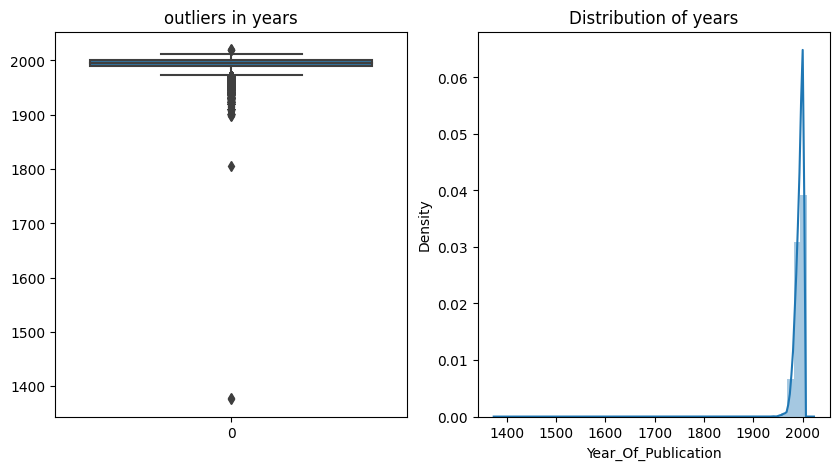

In [32]:
# checking the ouliers and distribution of year-of-publication column
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(books_df['Year_Of_Publication'])
plt.title('outliers in years')
plt.subplot(1,2,2)
sns.distplot(books_df['Year_Of_Publication'])
plt.title('Distribution of years')

## Checking Top Authors:

---



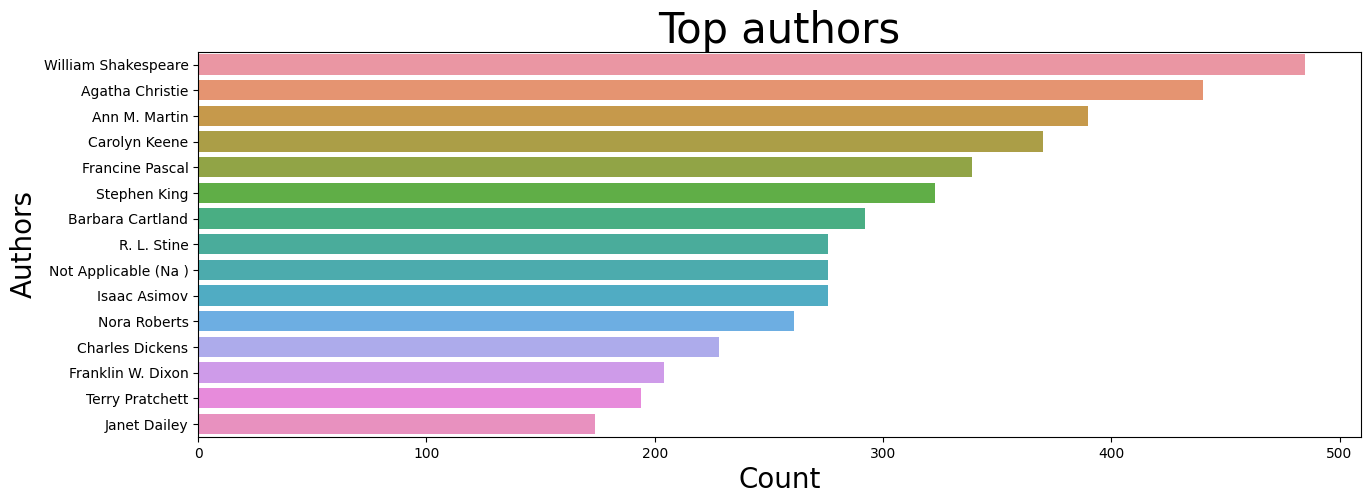

In [88]:
plt.figure(figsize=(15,5))

fig= sns.barplot(y= books_df.drop_duplicates(subset=['Book_Title']).Book_Author.value_counts().iloc[:15].reset_index()['index'],
            x= books_df.drop_duplicates(subset=['Book_Title']).Book_Author.value_counts().iloc[:15].reset_index()['Book_Author'])
fig.set_title('Top authors', fontsize= 30)
fig.set_xlabel('Count', fontsize= 20)
fig.set_ylabel('Authors', fontsize= 20)
plt.show()

## Top Five Authors are:

>### 1. William Shakespeare
>### 2. Agatha Christie
>### 3. Ann M. Martin
>### 4. Carolyn Keene
>### 5. Francine Pascal

## Checking Top Publisher:

---



Text(0.5, 1.0, 'Top Publishers')

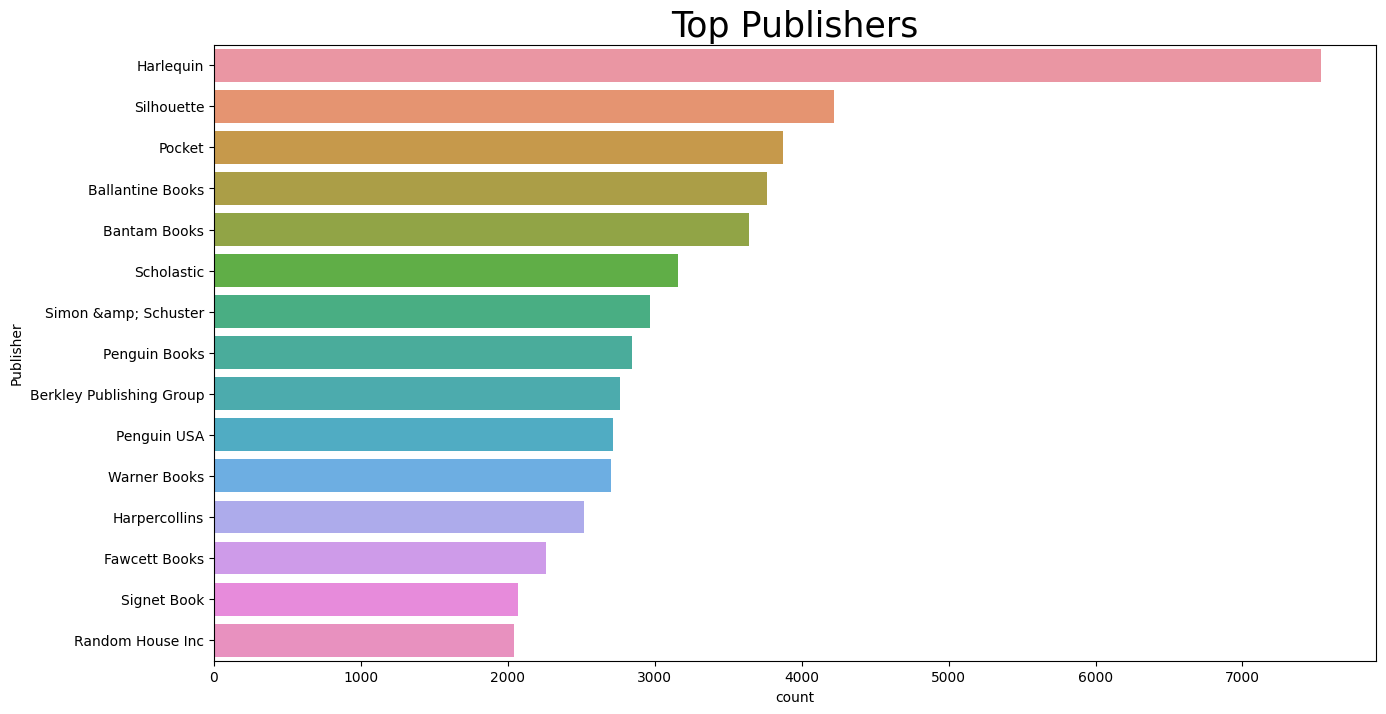

In [35]:
# Checking Top-15 Publishers.
plt.figure(figsize=(15,8))
sns.countplot(y='Publisher',data=books_df,order=pd.value_counts(books_df['Publisher']).iloc[:15].index)
plt.title('Top Publishers',fontsize=25)

## Top Five Publisher are:

>### 1. Harlequin
>### 2. Silhouette
>### 3. Pocket
>### 4. Ballantine Books
>### 5. Bantam Books

## Checking Top Publishing Years:

---



Text(0.5, 1.0, 'Top Publishing Years')

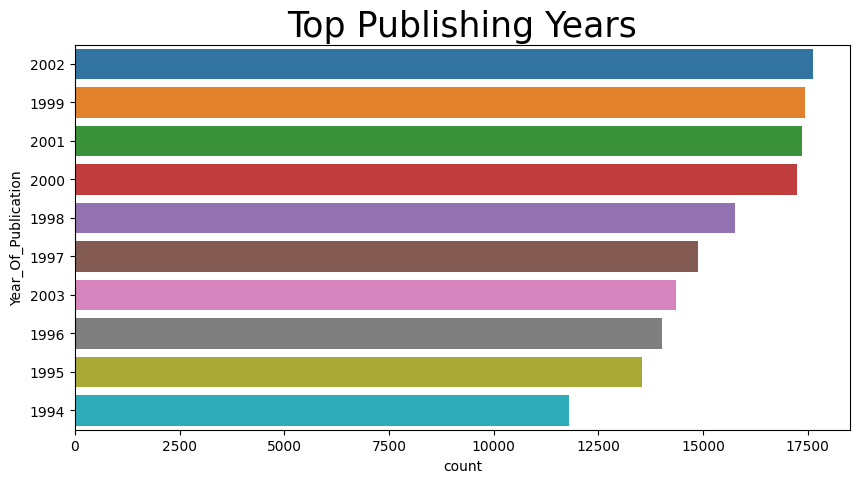

In [36]:
# Checking Top-10 Publishing Years.
plt.figure(figsize=(10,5))
sns.countplot(y='Year_Of_Publication',data=books_df,order=pd.value_counts(books_df['Year_Of_Publication']).iloc[:10].index)
plt.title('Top Publishing Years',fontsize=25)

### From above plot we can see that, highest number of booksn are published in the year of 2002 foollowed by 1999, 2001,2000.

## **Exploratory Data Analysis on users_df**

In [ ]:
# first look of users dataset
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# shape of users dataset
print('number of rows :', users_df.shape[0])
print('number of columns :', users_df.shape[1])

In [ ]:
users_df.info()

In [ ]:
users_df.describe(include = 'all')

In [ ]:
users_df.duplicated().sum()

In [ ]:
users_df.isnull().sum()

In [ ]:
print(sorted(users_df.Age.unique()))

In [ ]:
# lets check the outliers in Age column
sns.boxplot(y='Age',data = users_df)
plt.title('Outliers in Age column')

In [ ]:
# making the outlier values NaN
users_df[(users_df.Age < 5) | (users_df.Age > 100)] = np.nan

In [ ]:
# checking the distribution of age column
plt.figure(figsize = (6,4))
sns.distplot(users_df['Age'])
plt.title('Age distribution')

In [ ]:
# the distribution of the Age column is rightly skewed, so we can replace the null values with the median
users_df['Age'].fillna(users_df['Age'].median(), inplace=True)

In [ ]:
# checking the unique location names
users_df['Location'].unique()

In [ ]:
# number of unique locations
users_df['Location'].nunique()

## **Exploratory Data Analysis on ratings_df**

In [ ]:
# first look of the dataset
ratings_df.head()

In [ ]:
print('number of rows :', ratings_df.shape[0])
print('number of columns :', ratings_df.shape[1])

In [ ]:
# information of the rating dataset
ratings_df.info()

In [ ]:
#checking for duplicates
ratings_df.duplicated().sum()

In [ ]:
sorted(ratings_df['Book-Rating'].unique())

In [ ]:
x= books_df.copy()

In [ ]:
x.groupby('Book_Title')['Book_Title'].unique().reset_index()

ValueError: ignored

In [ ]:
books_df.shape

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
